In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime,time
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import statsmodels.api as smf

In [12]:
airlines=pd.read_csv("C:\\Users\\Admin\\Downloads\\Airlines+Data.csv")
airlines["Date"]=pd.to_datetime(airlines["Month"].str.replace(r'-(\d+)$', r'-19\1'))
airlines["month"]=airlines.Date.dt.strftime("%b")
airlines["year"]=airlines.Date.dt.strftime("%Y")

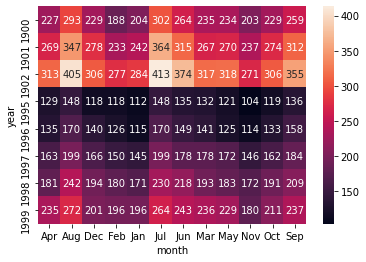

In [13]:
heat_map=pd.pivot_table(airlines,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heat_map,annot=True,fmt="g")

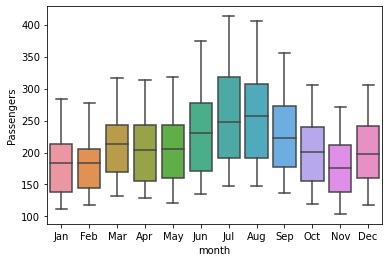

In [14]:
sns.boxplot(x="month",y="Passengers",data=airlines)

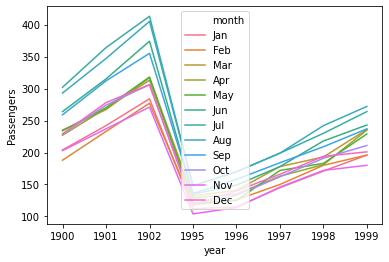

In [15]:
sns.lineplot(x="year",y="Passengers",hue="month",data=airlines)


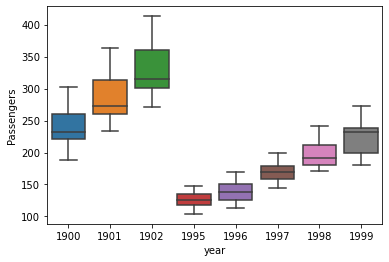

In [16]:
sns.boxplot(x="year",y="Passengers",data=airlines)

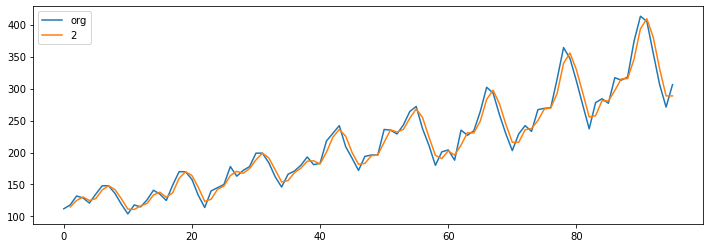

In [17]:
plt.figure(figsize=(12,4))
airlines.Passengers.plot(label="org")
for i in range(2,24,26):
    airlines["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

<ipython-input-18-8c42e882f352>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_ts_add=smf.tsa.seasonal_decompose(airlines["Passengers"],freq=10)


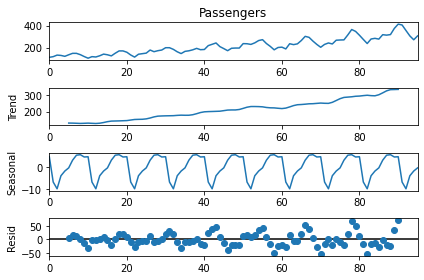

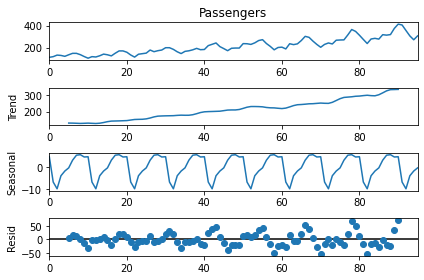

In [18]:
seasonal_ts_add=smf.tsa.seasonal_decompose(airlines["Passengers"],freq=10)
seasonal_ts_add.plot()

In [19]:
train=airlines.head(92)
test=airlines.tail(4)

In [20]:
def MAPE(pred,org):
    temp=np.abs((pred-org))*100/org
    return np.mean(temp)

In [25]:
Exp=SimpleExpSmoothing(train["Passengers"]).fit()
Exp_pred=Exp.predict(start=test.index[0],end=test.index[-1])
Exp_mape=MAPE(Exp_pred,test.Passengers) 
Exp_mape

32.05922096503483

In [26]:
hw=Holt(train["Passengers"]).fit()
hw_pred=hw.predict(start=test.index[0],end=test.index[-1])
hw_mape=MAPE(hw_pred,test.Passengers)
hw_mape

34.755378380255806

In [27]:
Exp_add_add=ExponentialSmoothing(train["Passengers"],damped=True,seasonal="add",seasonal_periods=12,trend="add").fit()
Exp_add_add_pred=Exp_add_add.predict(start=test.index[0],end=test.index[-1])
Exp_add_add_Mape=MAPE(Exp_add_add_pred,test.Passengers)
Exp_add_add_Mape

4.447146398300494

In [28]:
Exp_mul_add=ExponentialSmoothing(train["Passengers"],damped=True,seasonal="mul",seasonal_periods=12,trend="add").fit()
Exp_mul_add_pred=Exp_mul_add.predict(start=test.index[0],end=test.index[-1])
Exp_mul_add_mape=MAPE(Exp_mul_add_pred,test.Passengers)
Exp_mul_add_mape

7.3775302151303075

In [29]:
hwe_model_add_add = ExponentialSmoothing(airlines["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [30]:
hwe_model_add_add.forecast(10)

96     320.924021
97     313.638039
98     352.925020
99     350.350301
100    356.060922
101    408.899129
102    446.143114
103    433.358026
104    382.762459
105    336.170254
dtype: float64

In [31]:
Table={"Model":pd.Series(["Exp_mape","hw_mape","Exp_add_add_Mape","Exp_mul_add_mape"]),"MAPE VAlUES":pd.Series([Exp_mape,hw_mape,Exp_add_add_Mape,Exp_mul_add_mape])}
Table=pd.DataFrame(Table) 

In [32]:
Table

,Model,MAPE VAlUES
0,Exp_mape,32.059221
1,hw_mape,34.755378
2,Exp_add_add_Mape,4.447146
3,Exp_mul_add_mape,7.377530


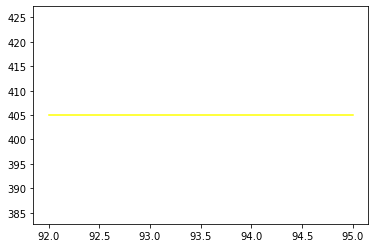

In [33]:
plt.plot(Exp_pred.index,Exp_pred,label="Simple Exp Smoothing",color="yellow")

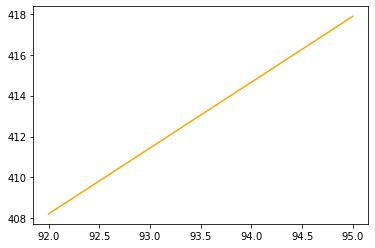

In [34]:
plt.plot(hw_pred.index,hw_pred,label="Holts method",color="orange")

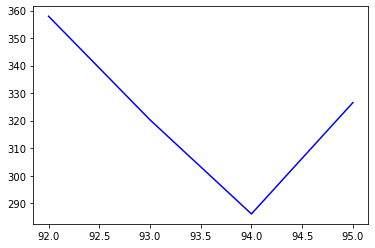

In [35]:
plt.plot(Exp_add_add_pred.index,Exp_add_add_pred,label="Exp Smoothing with add trend & add seasonality",color="blue")

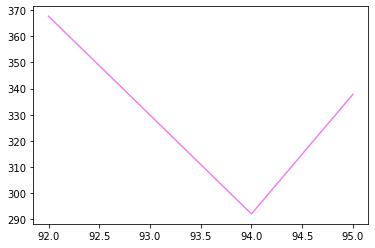

In [36]:
plt.plot(Exp_mul_add_pred.index,Exp_mul_add_pred,label="Exp Smoothing with add trend & mul seasonality",color="violet")